# Documentation ecg-classification
In this notebook I'll demonstrate some of the most important functionality of the code. Make sure you launch Jupyter Notebook from your conda environment. If you wish to run the notebook on Google Colab, then you must first clone the repository, you can find an example of how this is done in the training.ipynb file. If everything is installed correctly you can import the ecgc module like this: 

In [1]:
import ecgc

from matplotlib import pyplot as plt

## Configurations
In ecgc/config.py you can define some configurations. In the train/valid/test set variables you can define which patients make up the datasets. The current configuration is the same as in the paper of Rahal2016 for fair comparison.

In [2]:
print('Signal Frequency: ', ecgc.config.signal_frequency)
print('Window size :', ecgc.config.window)
print('Training set patients: ', ecgc.config.train)
print('Validation set patients: ', ecgc.config.valid)
print('Test set patients: ', ecgc.config.tests)
print('Relevant beat annotations symbols: ', ecgc.config.relsym)

Signal Frequency:  720
Window size : 1024
Training set patients:  [101, 106, 108, 109, 112, 114, 115, 116, 118, 119, 122, 124, 201, 203, 205, 207, 208, 209, 215, 220, 223, 230]
Validation set patients:  []
Test set patients:  [100, 103, 105, 111, 113, 117, 121, 123, 200, 202, 210, 212, 213, 214, 219, 221, 222, 228, 231, 232, 233, 234]
Relevant beat annotations symbols:  ['N', 'L', 'R', 'e', 'j', 'A', 'a', 'S', 'J', 'V', '!', 'E', 'F', '/', 'f', 'Q']


## Demo code
First we load some example beats. Note that the load_beats function makes use of the defined parameters in the config file.

In [3]:
def test_beats():
    beats0 = ecgc.load_beats('ecgc/mitdb/', [100], signal_format='ES')
    beats1 = ecgc.load_beats('ecgc/mitdb/', [200], signal_format='ES')
    beats2 = ecgc.load_beats('ecgc/mitdb/', [214], signal_format='ES')
    N = beats0[200]
    V = beats1[2]
    A = beats1[295]
    F = beats1[880]
    Q = beats2[400]
    return N, V, A, F, Q

N, V, A, F, Q = test_beats()

Loading beats took: 2.7s
Loading beats took: 2.6s
Loading beats took: 2.6s


The returned beats are instances of the "Beat" class. This class contains the raw signal as a list, and some info about the beat. E.g. what patient it is from, what beat annotation symbol it was classified as, and the corresponding AAMI class.

In [4]:
print(type(N))

# Signal lenght will be the same as ecgc.config.window
print('Beat signal lenght: ', len(N.signal))
print('Beat from patient: ', N.patient)
print('Beat annotation symbol: ', N.ba)
print('Numeric representation of corresponding AAMI class: ', N.aami_num)

<class 'ecgc.load_data.Beat'>
Beat signal lenght:  1024
Beat from patient:  100
Beat annotation symbol:  N
Numeric representation of corresponding AAMI class:  0


To look at the 1D signal of a beat simply use vizualise_beat(beat, title)

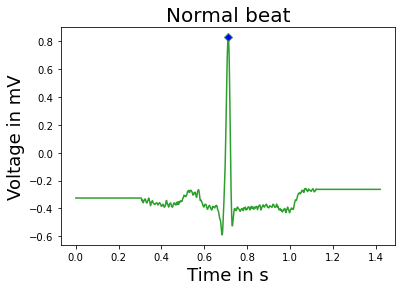

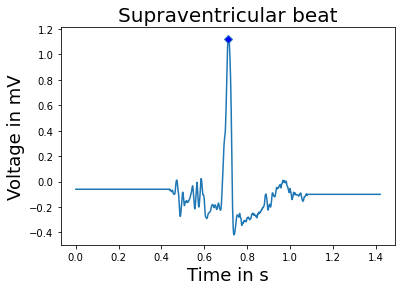

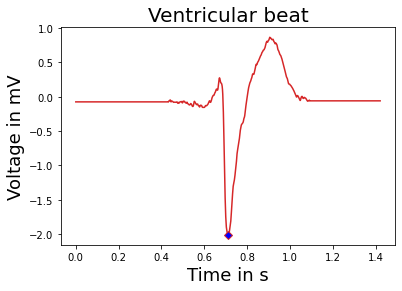

In [5]:
ecgc.vizualise_beat(N, 'Normal beat')

ecgc.vizualise_beat(A, 'Supraventricular beat', color='tab:blue')

ecgc.vizualise_beat(V, 'Ventricular beat', color='tab:red')

Reshape the 1D signal into a 3D tensor:

In [6]:
n_tensor = ecgc.to_tensor(N.signal)
a_tensor = ecgc.to_tensor(A.signal)
v_tensor = ecgc.to_tensor(V.signal)

print('Tensor shape: ', n_tensor.shape)

Tensor shape:  (32, 32, 3)


Vizualise tensor:


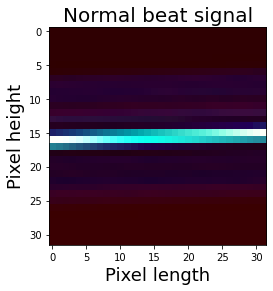

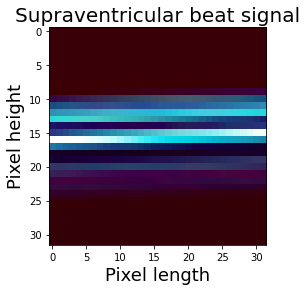

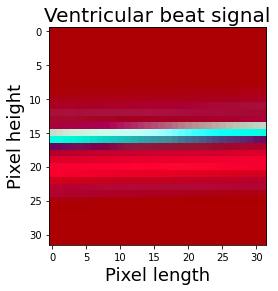

In [7]:
ecgc.vizualise_tensor(n_tensor, 'Normal beat')
ecgc.vizualise_tensor(a_tensor, 'Supraventricular beat')
ecgc.vizualise_tensor(v_tensor, 'Ventricular beat')

To get a deeper understanding of the signal reshaping, you can also take a look at the the different channels that make up the tensor, and the signals that created this channel.

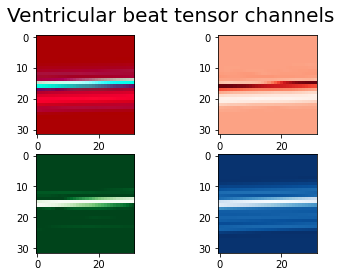

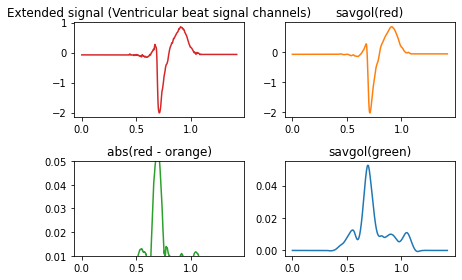

In [8]:
ecgc.vizualise_tensor(v_tensor, 'Ventricular beat tensor channels', vizualise_channels=True)

ecgc.vizualise_beat(V, 'Ventricular beat signal channels', vizualise_channels=True)

**Further research**: Wavelet transformations. 
Use wavelet transormations to reshape the signal. E.g. look at the the 3 example beats, they look rather different, thus the neural network should have a good time to pick up the differences. However, reshaping does take quite long.

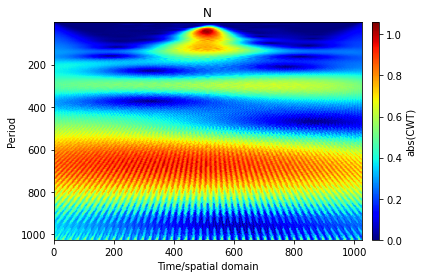

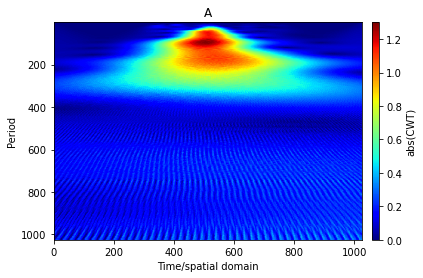

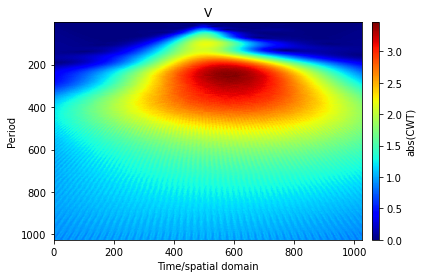

In [9]:
import scaleogram as scg
import numpy as np

def plot_wavelet_transform(signal, title=''):
    scg.cws(signal, scales=scg.periods2scales(np.arange(1, 1024 + 1)), coi=False)
    plt.title(title)
    plt.show()
    
plot_wavelet_transform(N.signal, 'N')
plot_wavelet_transform(A.signal, 'A')
plot_wavelet_transform(V.signal, 'V')

Demostration code of how to train the deep learning models, and how to evaluate these models can be found in the training notebook (training.ipynb)